## Data Preprocessing (Testing Dataset)

### Import Libraries

In [ ]:
%%time

!pip install --upgrade tensorflow
!pip install tensorflow keras
!pip install --upgrade tensorflow keras
!pip install keras
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2
import PIL.Image
import os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Glioma Tumor

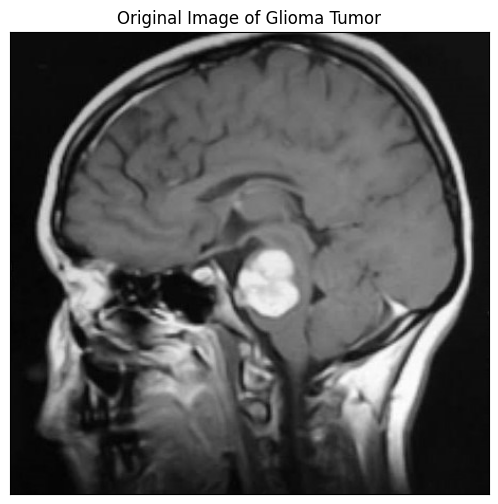

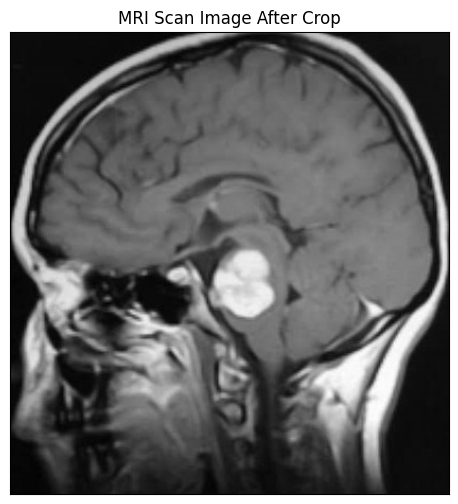

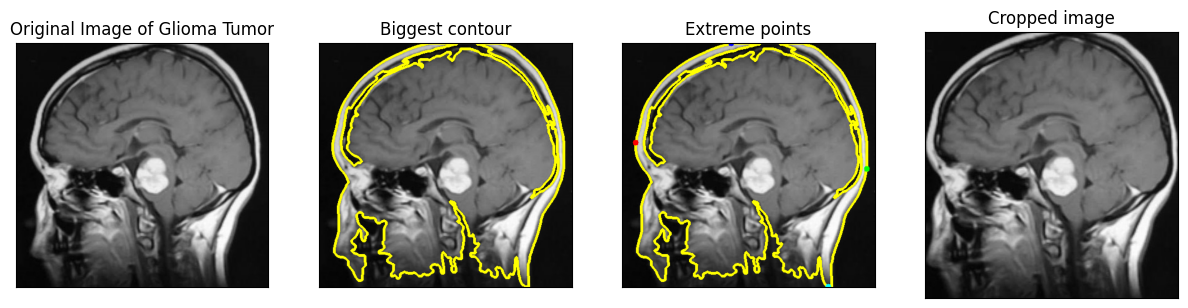

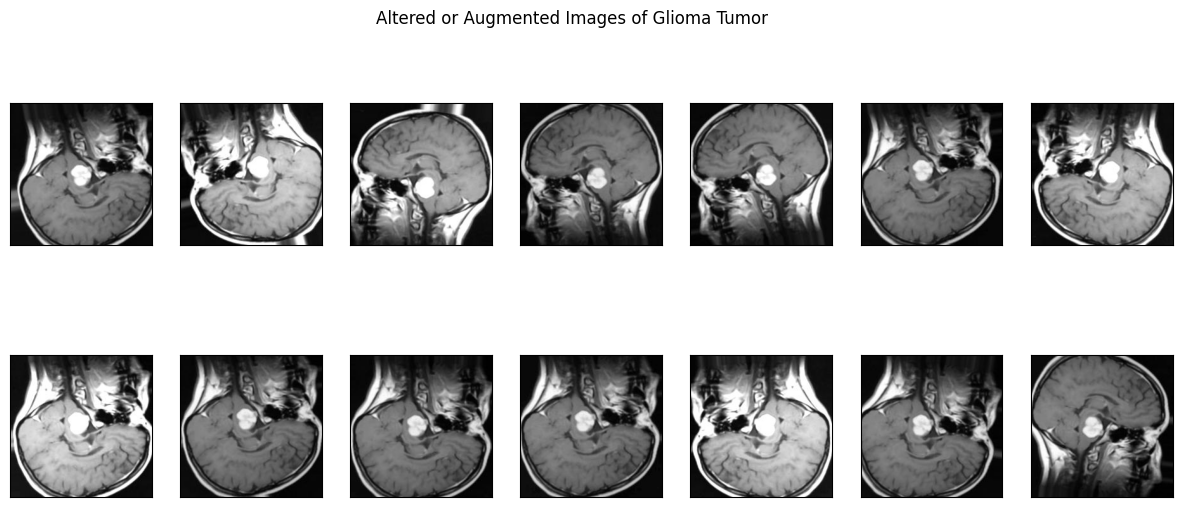

In [ ]:

%%time

def display_images(images, title, num_per_page=14, start_index=0):
    plt.figure(figsize=(15, 6))
    end_index = min(start_index + num_per_page, len(images))
    for i in range(start_index, end_index):
        img = cv2.imread(images[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 7, i - start_index + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(title)
    plt.show()

def cropandalter():
    flag1 = 0
    flag2 = 0
    j = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)

    directory_g = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing//glioma_tumor"]
    directory_output_g = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing_Output//glioma_tumor_Output"]

    btimages = ImageDataGenerator(rotation_range=15, width_shift_range=0.05, height_shift_range=0.05, rescale=1./255, shear_range=0.05, brightness_range=[0.2, 1.7], horizontal_flip=True, vertical_flip=True)

    for input_folder_g in directory_g:
        for output_folder_g in directory_output_g:
            if not os.path.exists(output_folder_g):
                os.makedirs(output_folder_g)

            for img in os.listdir(input_folder_g):
                image = cv2.imread(os.path.join(input_folder_g, img))
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                gray = cv2.GaussianBlur(gray, (5, 5), 0)

                if flag1 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Original Image of Glioma Tumor')
                    plt.show()
                    flag1 = 1

                equ = cv2.equalizeHist(gray)
                thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
                thresh = cv2.erode(thresh, None, iterations=2)
                thresh = cv2.dilate(thresh, None, iterations=2)

                cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cnts = imutils.grab_contours(cnts)
                c = max(cnts, key=cv2.contourArea)

                extremeL = tuple(c[c[:, :, 0].argmin()][0])
                extremeR = tuple(c[c[:, :, 0].argmax()][0])
                extremeT = tuple(c[c[:, :, 1].argmin()][0])
                extremeB = tuple(c[c[:, :, 1].argmax()][0])

                img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
                img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
                img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
                img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
                img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

                ADD_PIXELS = 0
                new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
                resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

                if flag2 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('MRI Scan Image After Crop')
                    plt.show()
                    flag2 = 1

                plt.figure(figsize=(15, 6))
                plt.subplot(141)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Original Image of Glioma Tumor')
                plt.subplot(142)
                plt.imshow(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Biggest contour')
                plt.subplot(143)
                plt.imshow(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Extreme points')
                plt.subplot(144)
                plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Cropped image')
                plt.show()

                x = resized_img
                x = x.reshape((1,) + x.shape)
                i = 0

                for batch in btimages.flow(x, batch_size=1, save_to_dir=output_folder_g, save_prefix=f'glioma_tumor_Output_{j:04d}_', save_format='jpg'):
                    i += 1
                    if i >= 14:
                        break
                    j += 1

                output_images = [os.path.join(output_folder_g, img) for img in os.listdir(output_folder_g)]

                # Displaying the last 14 images
                if len(output_images) > 0:
                    display_images(output_images[-14:], 'Altered or Augmented Images of Glioma Tumor')

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    # Process and save all remaining images in the folder
                    for remaining_img in os.listdir(input_folder_g):
                        if remaining_img == img:
                            continue
                        remaining_image = cv2.imread(os.path.join(input_folder_g, remaining_img))
                        gray_remaining = cv2.cvtColor(remaining_image, cv2.COLOR_RGB2GRAY)
                        gray_remaining = cv2.GaussianBlur(gray_remaining, (5, 5), 0)
                        equ_remaining = cv2.equalizeHist(gray_remaining)
                        thresh_remaining = cv2.threshold(gray_remaining, 40, 250, cv2.THRESH_BINARY)[1]
                        thresh_remaining = cv2.erode(thresh_remaining, None, iterations=2)
                        thresh_remaining = cv2.dilate(thresh_remaining, None, iterations=2)
                        cnts_remaining = cv2.findContours(thresh_remaining.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        cnts_remaining = imutils.grab_contours(cnts_remaining)
                        c_remaining = max(cnts_remaining, key=cv2.contourArea)
                        extremeL_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmin()][0])
                        extremeR_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmax()][0])
                        extremeT_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmin()][0])
                        extremeB_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmax()][0])
                        new_img_remaining = remaining_image[extremeT_remaining[1] - ADD_PIXELS:extremeB_remaining[1] + ADD_PIXELS, extremeL_remaining[0] - ADD_PIXELS:extremeR_remaining[0] + ADD_PIXELS].copy()
                        resized_img_remaining = cv2.resize(new_img_remaining, dim, interpolation=cv2.INTER_AREA)
                        x_remaining = resized_img_remaining
                        x_remaining = x_remaining.reshape((1,) + x_remaining.shape)
                        remaining_i = 0
                        for batch_remaining in btimages.flow(x_remaining, batch_size=1, save_to_dir=output_folder_g, save_prefix=f'glioma_tumor_Output_{j:04d}_', save_format='jpg'):
                            remaining_i += 1
                            if remaining_i >= 14:
                                break
                            j += 1
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

cropandalter()

import psutil
import resource
import tracemalloc

tracemalloc.start()

def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
    print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

def print_cpu_usage():
    print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

def print_disk_usage():
    disk_usage = psutil.disk_usage('/')
    print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
    print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
    print(f"Disk Usage: {disk_usage.percent}%")

def print_resource_usage():
    usage = resource.getrusage(resource.RUSAGE_SELF)
    print(f"User CPU time: {usage.ru_utime:.2f} seconds")
    print(f"System CPU time: {usage.ru_stime:.2f} seconds")

def print_tracemalloc_usage():
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
    print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")

print_memory_usage()
print_cpu_usage()
print_disk_usage()
print_resource_usage()
print_tracemalloc_usage()

### Meningioma Tumor

In [ ]:

%%time

def display_images(images, title, num_per_page=14, start_index=0):
    plt.figure(figsize=(15, 6))
    end_index = min(start_index + num_per_page, len(images))
    for i in range(start_index, end_index):
        img = cv2.imread(images[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 7, i - start_index + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(title)
    plt.show()

def cropandalter():
    flag1 = 0
    flag2 = 0
    j = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)

    directory_m = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing//meningioma_tumor"]
    directory_output_m = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing_Output//meningioma_tumor_Output"]

    btimages = ImageDataGenerator(rotation_range=15, width_shift_range=0.05, height_shift_range=0.05, rescale=1./255, shear_range=0.05, brightness_range=[0.2, 1.7], horizontal_flip=True, vertical_flip=True)

    for input_folder_m in directory_m:
        for output_folder_m in directory_output_m:
            if not os.path.exists(output_folder_m):
                os.makedirs(output_folder_m)

            for img in os.listdir(input_folder_m):
                image = cv2.imread(os.path.join(input_folder_m, img))
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                gray = cv2.GaussianBlur(gray, (5, 5), 0)

                if flag1 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Original Image of Meningioma Tumor')
                    plt.show()
                    flag1 = 1

                equ = cv2.equalizeHist(gray)
                thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
                thresh = cv2.erode(thresh, None, iterations=2)
                thresh = cv2.dilate(thresh, None, iterations=2)

                cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cnts = imutils.grab_contours(cnts)
                c = max(cnts, key=cv2.contourArea)

                extremeL = tuple(c[c[:, :, 0].argmin()][0])
                extremeR = tuple(c[c[:, :, 0].argmax()][0])
                extremeT = tuple(c[c[:, :, 1].argmin()][0])
                extremeB = tuple(c[c[:, :, 1].argmax()][0])

                img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
                img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
                img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
                img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
                img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

                ADD_PIXELS = 0
                new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
                resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

                if flag2 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('MRI Scan Image After Crop')
                    plt.show()
                    flag2 = 1

                plt.figure(figsize=(15, 6))
                plt.subplot(141)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Original Image of Meningioma Tumor')
                plt.subplot(142)
                plt.imshow(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Biggest contour')
                plt.subplot(143)
                plt.imshow(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Extreme points')
                plt.subplot(144)
                plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Cropped image')
                plt.show()

                x = resized_img
                x = x.reshape((1,) + x.shape)
                i = 0

                for batch in btimages.flow(x, batch_size=1, save_to_dir=output_folder_m, save_prefix=f'mt_Output_{j:04d}_', save_format='jpg'):
                    i += 1
                    if i >= 14:
                        break
                    j += 1

                output_images = [os.path.join(output_folder_m, img) for img in os.listdir(output_folder_m)]

                # Displaying the last 14 images
                if len(output_images) > 0:
                    display_images(output_images[-14:], 'Altered or Augmented Images of Meningioma Tumor')

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    # Process and save all remaining images in the folder
                    for remaining_img in os.listdir(input_folder_m):
                        if remaining_img == img:
                            continue
                        remaining_image = cv2.imread(os.path.join(input_folder_m, remaining_img))
                        gray_remaining = cv2.cvtColor(remaining_image, cv2.COLOR_RGB2GRAY)
                        gray_remaining = cv2.GaussianBlur(gray_remaining, (5, 5), 0)
                        equ_remaining = cv2.equalizeHist(gray_remaining)
                        thresh_remaining = cv2.threshold(gray_remaining, 40, 250, cv2.THRESH_BINARY)[1]
                        thresh_remaining = cv2.erode(thresh_remaining, None, iterations=2)
                        thresh_remaining = cv2.dilate(thresh_remaining, None, iterations=2)
                        cnts_remaining = cv2.findContours(thresh_remaining.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        cnts_remaining = imutils.grab_contours(cnts_remaining)
                        c_remaining = max(cnts_remaining, key=cv2.contourArea)
                        extremeL_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmin()][0])
                        extremeR_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmax()][0])
                        extremeT_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmin()][0])
                        extremeB_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmax()][0])
                        new_img_remaining = remaining_image[extremeT_remaining[1] - ADD_PIXELS:extremeB_remaining[1] + ADD_PIXELS, extremeL_remaining[0] - ADD_PIXELS:extremeR_remaining[0] + ADD_PIXELS].copy()
                        resized_img_remaining = cv2.resize(new_img_remaining, dim, interpolation=cv2.INTER_AREA)
                        x_remaining = resized_img_remaining
                        x_remaining = x_remaining.reshape((1,) + x_remaining.shape)
                        remaining_i = 0
                        for batch_remaining in btimages.flow(x_remaining, batch_size=1, save_to_dir=output_folder_m, save_prefix=f'mt_Output_{j:04d}_', save_format='jpg'):
                            remaining_i += 1
                            if remaining_i >= 14:
                                break
                            j += 1
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

cropandalter()

import psutil
import resource
import tracemalloc

tracemalloc.start()

def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
    print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

def print_cpu_usage():
    print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

def print_disk_usage():
    disk_usage = psutil.disk_usage('/')
    print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
    print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
    print(f"Disk Usage: {disk_usage.percent}%")

def print_resource_usage():
    usage = resource.getrusage(resource.RUSAGE_SELF)
    print(f"User CPU time: {usage.ru_utime:.2f} seconds")
    print(f"System CPU time: {usage.ru_stime:.2f} seconds")

def print_tracemalloc_usage():
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
    print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")

print_memory_usage()
print_cpu_usage()
print_disk_usage()
print_resource_usage()
print_tracemalloc_usage()

### Pituitary Tumor

In [ ]:

%%time

def display_images(images, title, num_per_page=14, start_index=0):
    plt.figure(figsize=(15, 6))
    end_index = min(start_index + num_per_page, len(images))
    for i in range(start_index, end_index):
        img = cv2.imread(images[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 7, i - start_index + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(title)
    plt.show()

def cropandalter():
    flag1 = 0
    flag2 = 0
    j = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)

    directory_p = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing//pituitary_tumor"]
    directory_output_p = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing_Output//pituitary_tumor_Output"]

    btimages = ImageDataGenerator(rotation_range=15, width_shift_range=0.05, height_shift_range=0.05, rescale=1./255, shear_range=0.05, brightness_range=[0.2, 1.7], horizontal_flip=True, vertical_flip=True)

    for input_folder_p in directory_p:
        for output_folder_p in directory_output_p:
            if not os.path.exists(output_folder_p):
                os.makedirs(output_folder_p)

            for img in os.listdir(input_folder_p):
                image = cv2.imread(os.path.join(input_folder_p, img))
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                gray = cv2.GaussianBlur(gray, (5, 5), 0)

                if flag1 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Original Image of Pituitary Tumor')
                    plt.show()
                    flag1 = 1

                equ = cv2.equalizeHist(gray)
                thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
                thresh = cv2.erode(thresh, None, iterations=2)
                thresh = cv2.dilate(thresh, None, iterations=2)

                cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cnts = imutils.grab_contours(cnts)
                c = max(cnts, key=cv2.contourArea)

                extremeL = tuple(c[c[:, :, 0].argmin()][0])
                extremeR = tuple(c[c[:, :, 0].argmax()][0])
                extremeT = tuple(c[c[:, :, 1].argmin()][0])
                extremeB = tuple(c[c[:, :, 1].argmax()][0])

                img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
                img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
                img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
                img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
                img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

                ADD_PIXELS = 0
                new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
                resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

                if flag2 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('MRI Scan Image After Crop')
                    plt.show()
                    flag2 = 1

                plt.figure(figsize=(15, 6))
                plt.subplot(141)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Original Image of Pituitary Tumor')
                plt.subplot(142)
                plt.imshow(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Biggest contour')
                plt.subplot(143)
                plt.imshow(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Extreme points')
                plt.subplot(144)
                plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Cropped image')
                plt.show()

                x = resized_img
                x = x.reshape((1,) + x.shape)
                i = 0

                for batch in btimages.flow(x, batch_size=1, save_to_dir=output_folder_p, save_prefix=f'pt_Output_{j:04d}_', save_format='jpg'):
                    i += 1
                    if i >= 14:
                        break
                    j += 1

                output_images = [os.path.join(output_folder_p, img) for img in os.listdir(output_folder_p)]

                # Displaying the last 14 images
                if len(output_images) > 0:
                    display_images(output_images[-14:], 'Altered or Augmented Images of Pituitary Tumor')

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    # Process and save all remaining images in the folder
                    for remaining_img in os.listdir(input_folder_p):
                        if remaining_img == img:
                            continue
                        remaining_image = cv2.imread(os.path.join(input_folder_p, remaining_img))
                        gray_remaining = cv2.cvtColor(remaining_image, cv2.COLOR_RGB2GRAY)
                        gray_remaining = cv2.GaussianBlur(gray_remaining, (5, 5), 0)
                        equ_remaining = cv2.equalizeHist(gray_remaining)
                        thresh_remaining = cv2.threshold(gray_remaining, 40, 250, cv2.THRESH_BINARY)[1]
                        thresh_remaining = cv2.erode(thresh_remaining, None, iterations=2)
                        thresh_remaining = cv2.dilate(thresh_remaining, None, iterations=2)
                        cnts_remaining = cv2.findContours(thresh_remaining.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        cnts_remaining = imutils.grab_contours(cnts_remaining)
                        c_remaining = max(cnts_remaining, key=cv2.contourArea)
                        extremeL_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmin()][0])
                        extremeR_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmax()][0])
                        extremeT_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmin()][0])
                        extremeB_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmax()][0])
                        new_img_remaining = remaining_image[extremeT_remaining[1] - ADD_PIXELS:extremeB_remaining[1] + ADD_PIXELS, extremeL_remaining[0] - ADD_PIXELS:extremeR_remaining[0] + ADD_PIXELS].copy()
                        resized_img_remaining = cv2.resize(new_img_remaining, dim, interpolation=cv2.INTER_AREA)
                        x_remaining = resized_img_remaining
                        x_remaining = x_remaining.reshape((1,) + x_remaining.shape)
                        remaining_i = 0
                        for batch_remaining in btimages.flow(x_remaining, batch_size=1, save_to_dir=output_folder_p, save_prefix=f'pt_Output_{j:04d}_', save_format='jpg'):
                            remaining_i += 1
                            if remaining_i >= 14:
                                break
                            j += 1
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

cropandalter()


import psutil
import resource
import tracemalloc

tracemalloc.start()

def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
    print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

def print_cpu_usage():
    print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

def print_disk_usage():
    disk_usage = psutil.disk_usage('/')
    print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
    print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
    print(f"Disk Usage: {disk_usage.percent}%")

def print_resource_usage():
    usage = resource.getrusage(resource.RUSAGE_SELF)
    print(f"User CPU time: {usage.ru_utime:.2f} seconds")
    print(f"System CPU time: {usage.ru_stime:.2f} seconds")

def print_tracemalloc_usage():
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
    print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")

print_memory_usage()
print_cpu_usage()
print_disk_usage()
print_resource_usage()
print_tracemalloc_usage()

### No Tumor

In [ ]:

%%time

def display_images(images, title, num_per_page=14, start_index=0):
    plt.figure(figsize=(15, 6))
    end_index = min(start_index + num_per_page, len(images))
    for i in range(start_index, end_index):
        img = cv2.imread(images[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 7, i - start_index + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(title)
    plt.show()

def cropandalter():
    flag1 = 0
    flag2 = 0
    j = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)

    directory_n = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing//no_tumor"]
    directory_output_n = ["//content//drive//My Drive//Masters Project//Brain Tumor Classification//Testing_Output//no_tumor_Output"]

    btimages = ImageDataGenerator(rotation_range=15, width_shift_range=0.05, height_shift_range=0.05, rescale=1./255, shear_range=0.05, brightness_range=[0.2, 1.7], horizontal_flip=True, vertical_flip=True)

    for input_folder_n in directory_n:
        for output_folder_n in directory_output_n:
            if not os.path.exists(output_folder_n):
                os.makedirs(output_folder_n)

            for img in os.listdir(input_folder_n):
                image = cv2.imread(os.path.join(input_folder_n, img))
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                gray = cv2.GaussianBlur(gray, (5, 5), 0)

                if flag1 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('Original Image of Meningioma Tumor')
                    plt.show()
                    flag1 = 1

                equ = cv2.equalizeHist(gray)
                thresh = cv2.threshold(gray, 40, 250, cv2.THRESH_BINARY)[1]
                thresh = cv2.erode(thresh, None, iterations=2)
                thresh = cv2.dilate(thresh, None, iterations=2)

                cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cnts = imutils.grab_contours(cnts)
                c = max(cnts, key=cv2.contourArea)

                extremeL = tuple(c[c[:, :, 0].argmin()][0])
                extremeR = tuple(c[c[:, :, 0].argmax()][0])
                extremeT = tuple(c[c[:, :, 1].argmin()][0])
                extremeB = tuple(c[c[:, :, 1].argmax()][0])

                img_cntr = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
                img_point = cv2.circle(img_cntr.copy(), extremeL, 5, (0, 0, 255), -1)
                img_point = cv2.circle(img_point, extremeR, 5, (0, 255, 0), -1)
                img_point = cv2.circle(img_point, extremeT, 5, (255, 0, 0), -1)
                img_point = cv2.circle(img_point, extremeB, 5, (255, 255, 0), -1)

                ADD_PIXELS = 0
                new_img = image[extremeT[1] - ADD_PIXELS:extremeB[1] + ADD_PIXELS, extremeL[0] - ADD_PIXELS:extremeR[0] + ADD_PIXELS].copy()
                resized_img = cv2.resize(new_img, dim, interpolation=cv2.INTER_AREA)

                if flag2 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                    plt.xticks([])
                    plt.yticks([])
                    plt.title('MRI Scan Image After Crop')
                    plt.show()
                    flag2 = 1

                plt.figure(figsize=(15, 6))
                plt.subplot(141)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Original Image of No Tumor')
                plt.subplot(142)
                plt.imshow(cv2.cvtColor(img_cntr, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Biggest contour')
                plt.subplot(143)
                plt.imshow(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Extreme points')
                plt.subplot(144)
                plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Cropped image')
                plt.show()

                x = resized_img
                x = x.reshape((1,) + x.shape)
                i = 0

                for batch in btimages.flow(x, batch_size=1, save_to_dir=output_folder_n, save_prefix=f'nt_Output_{j:04d}_', save_format='jpg'):
                    i += 1
                    if i >= 14:
                        break
                    j += 1

                output_images = [os.path.join(output_folder_n, img) for img in os.listdir(output_folder_n)]

                # Displaying the last 14 images
                if len(output_images) > 0:
                    display_images(output_images[-14:], 'Altered or Augmented Images of No Tumor')

                user_input = input("Enter 'n' to process the next image, 'q' to quit and save all remaining images without displaying: ").strip().lower()
                if user_input == 'q':
                    # Process and save all remaining images in the folder
                    for remaining_img in os.listdir(input_folder_n):
                        if remaining_img == img:
                            continue
                        remaining_image = cv2.imread(os.path.join(input_folder_n, remaining_img))
                        gray_remaining = cv2.cvtColor(remaining_image, cv2.COLOR_RGB2GRAY)
                        gray_remaining = cv2.GaussianBlur(gray_remaining, (5, 5), 0)
                        equ_remaining = cv2.equalizeHist(gray_remaining)
                        thresh_remaining = cv2.threshold(gray_remaining, 40, 250, cv2.THRESH_BINARY)[1]
                        thresh_remaining = cv2.erode(thresh_remaining, None, iterations=2)
                        thresh_remaining = cv2.dilate(thresh_remaining, None, iterations=2)
                        cnts_remaining = cv2.findContours(thresh_remaining.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        cnts_remaining = imutils.grab_contours(cnts_remaining)
                        c_remaining = max(cnts_remaining, key=cv2.contourArea)
                        extremeL_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmin()][0])
                        extremeR_remaining = tuple(c_remaining[c_remaining[:, :, 0].argmax()][0])
                        extremeT_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmin()][0])
                        extremeB_remaining = tuple(c_remaining[c_remaining[:, :, 1].argmax()][0])
                        new_img_remaining = remaining_image[extremeT_remaining[1] - ADD_PIXELS:extremeB_remaining[1] + ADD_PIXELS, extremeL_remaining[0] - ADD_PIXELS:extremeR_remaining[0] + ADD_PIXELS].copy()
                        resized_img_remaining = cv2.resize(new_img_remaining, dim, interpolation=cv2.INTER_AREA)
                        x_remaining = resized_img_remaining
                        x_remaining = x_remaining.reshape((1,) + x_remaining.shape)
                        remaining_i = 0
                        for batch_remaining in btimages.flow(x_remaining, batch_size=1, save_to_dir=output_folder_n, save_prefix=f'nt_Output_{j:04d}_', save_format='jpg'):
                            remaining_i += 1
                            if remaining_i >= 14:
                                break
                            j += 1
                    print("All remaining images have been processed and saved.")
                    return
                elif user_input != 'n':
                    print("Invalid input. Please enter 'n' or 'q'.")
                    continue

cropandalter()

import psutil
import resource
import tracemalloc

tracemalloc.start()

def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"RSS: {mem_info.rss / 1024 ** 2:.2f} MB")
    print(f"VMS: {mem_info.vms / 1024 ** 2:.2f} MB")

def print_cpu_usage():
    print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

def print_disk_usage():
    disk_usage = psutil.disk_usage('/')
    print(f"Total Disk Space: {disk_usage.total / 1024 ** 3:.2f} GB")
    print(f"Used Disk Space: {disk_usage.used / 1024 ** 3:.2f} GB")
    print(f"Disk Usage: {disk_usage.percent}%")

def print_resource_usage():
    usage = resource.getrusage(resource.RUSAGE_SELF)
    print(f"User CPU time: {usage.ru_utime:.2f} seconds")
    print(f"System CPU time: {usage.ru_stime:.2f} seconds")

def print_tracemalloc_usage():
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current Memory Usage: {current / 1024 ** 2:.2f} MB")
    print(f"Peak Memory Usage: {peak / 1024 ** 2:.2f} MB")


print_memory_usage()
print_cpu_usage()
print_disk_usage()
print_resource_usage()
print_tracemalloc_usage()